DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE AGRUPAMENTO :

De acordo com os resultados obtidos no código o algoritmo K-means obteve o melhor agrupamento.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wine-clustering.csv', sep= ',', encoding='iso-8859-1')

In [3]:
df.head(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
# Escalonamento 

from sklearn.preprocessing import StandardScaler

escala = StandardScaler()
df_esc = escala.fit_transform(df)

In [6]:
df_esc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
df_esc.shape

(178, 13)

In [26]:
# Elbow Method

from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

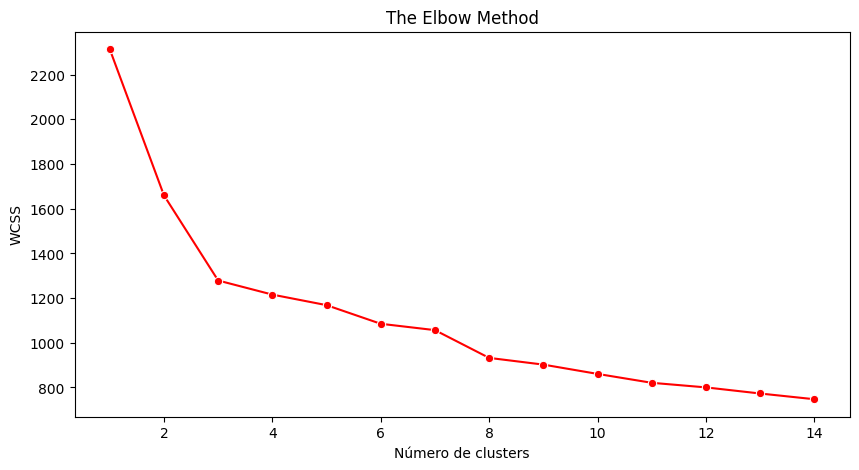

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [29]:
kmeans2 = kmeans.fit(df_esc)

In [30]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12785706, -0.38002418, -0.10667572, -1.12455043,  0.68517176,
         1.14815757,  1.1482672 , -0.80460362,  0.97199984,  0.43440557,
         0.33000346,  0.85497227,  1.24165558],
       [-1.03360427, -0.43744566,  0.32284649,  0.72026495, -0.37142577,
        -0.34985013, -0.05691389,  0.65048019, -0.19769529, -0.90882655,
         0.46775646,  0.08509981, -0.74524252],
       [ 0.11658681,  1.97196547, -0.15632743,  0.44256188, -0.78492006,
        -0.89648425, -1.12182706,  1.06279293, -0.72759477,  0.18520921,
        -1.12403371, -1.06789207, -0.57386411],
       [ 0.66787361, -0.23127271,  0.79804081, -0.12731365,  0.42130549,
         0.64204478,  0.7527367 , -0.39183601,  0.2324131 , -0.09587406,
         0.65796882,  0.70338526,  1.01506344],
       [ 0.14646686,  0.48025251,  0.3031835 ,  0.56800187,  0.17185531,
        -0.95659875, -1.18069139,  0.54039665, -0.75165633,  1.16023071,
        -1.16627667, -1.30259139, -0.3589054 ],
       [-0.90250679, -0.520902

In [31]:
# Inversão do escalonamento

escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.39136667e+01, 1.91300000e+00, 2.33733333e+00, 1.57500000e+01,
        1.09500000e+02, 3.01166667e+00, 3.17300000e+00, 2.62000000e-01,
        2.14566667e+00, 6.06233333e+00, 1.03266667e+00, 3.21700000e+00,
        1.13680000e+03],
       [1.21638710e+01, 1.84903226e+00, 2.45483871e+00, 2.18935484e+01,
        9.44516129e+01, 2.07677419e+00, 1.97258065e+00, 4.42580645e-01,
        1.47806452e+00, 2.95709677e+00, 1.06406452e+00, 2.67193548e+00,
        5.12870968e+02],
       [1.30950000e+01, 4.53312500e+00, 2.32375000e+00, 2.09687500e+01,
        8.85625000e+01, 1.73562500e+00, 9.11875000e-01, 4.93750000e-01,
        1.17562500e+00, 5.48625000e+00, 7.01250000e-01, 1.85562500e+00,
        5.66687500e+02],
       [1.35412903e+01, 2.07870968e+00, 2.58483871e+00, 1.90709677e+01,
        1.05741935e+02, 2.69580645e+00, 2.77903226e+00, 3.13225806e-01,
        1.72354839e+00, 4.83645161e+00, 1.10741935e+00, 3.10967742e+00,
        1.06564516e+03],
       [1.31191892e+01, 2.87135135e+

In [32]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 5, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 5, 1, 4, 5, 5, 1, 1,
       5, 5, 1, 5, 1, 3, 1, 3, 5, 5, 5, 1, 5, 1, 5, 5, 1, 2, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 5, 5, 0, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 1,
       5, 5, 1, 1, 1, 1, 5, 1, 2, 5, 5, 1, 1, 2, 5, 5, 1, 1, 1, 2, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4])

In [33]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,0
1,0
2,3
3,0
4,3
...,...
173,2
174,4
175,4
176,4


In [34]:
df2 = pd.concat([df, agrupamento2],axis=1)
df2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [35]:
df2.iloc[100 , :]

Alcohol                  12.08
Malic_Acid                2.08
Ash                       1.70
Ash_Alcanity             17.50
Magnesium                97.00
Total_Phenols             2.23
Flavanoids                2.17
Nonflavanoid_Phenols      0.26
Proanthocyanins           1.40
Color_Intensity           3.30
Hue                       1.27
OD280                     2.96
Proline                 710.00
Grupo                     5.00
Name: 100, dtype: float64

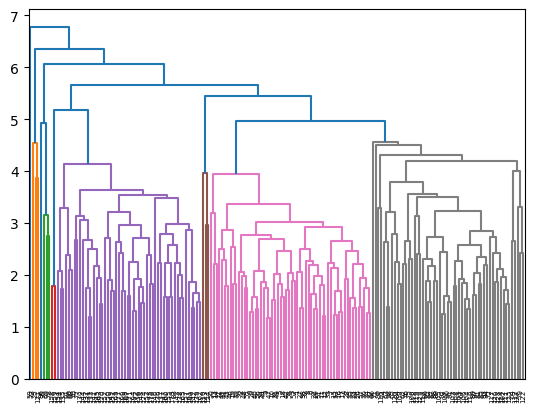

In [36]:
# ALGORITMO HIERÁRQUICO

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

dendrograma = dendrogram(linkage(df_esc, method = 'average'))

In [40]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage = 'average')
classificacao3 = hier.fit_predict(df_esc)

In [41]:
classificacao3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0,
       0, 0, 4, 1, 4, 0, 0, 2, 0, 0, 0, 4, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 5, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [42]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,4
174,4
175,4
176,4


In [43]:
df3 = pd.concat([df, agrupamento3],axis=1)
df3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [51]:
# ALGORITMO DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.73, min_samples=4)
dbscan.fit(df_esc)

DBSCAN(eps=0.73, min_samples=4)

In [52]:
classificacao4 = dbscan.labels_
classificacao4

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [53]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

,Grupo
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
173,-1
174,-1
175,-1
176,-1


In [54]:
# ALGORITMO MEANSHIFT

from sklearn.cluster import MeanShift

mean = MeanShift(bandwidth=1.5, cluster_all=True)

In [55]:
mean.fit(df_esc)

MeanShift(bandwidth=1.5)

In [56]:
classificacao5 = mean.labels_
classificacao5

array([  0,  65,  69,  21,  63,  25,   8,  30,  17,   6,  28,   8,   8,
        18,  20,   1,   1,   1,  26,  46,   0,  79,   2,   2,   2,  75,
         9,  11,  34,   6,  40,  49,  44,  38,  10,   2,  60,  10,  11,
        23,   0,  56,  33,  62,   6,  24,  19,   6,  29,  31,  76,  36,
        37,   1,   0,  50,   0,   9,  41, 105, 108,  90,  45,  14, 118,
       103,  71, 104,  59, 117, 112,  35,  53,  78, 126, 134,  77, 128,
       109,  88, 125,  87,  16,  74, 129,  89, 119,  16, 135, 122,   4,
         4,   4, 111, 136,  96, 131, 113,  14, 110, 120,  92, 107, 130,
         7, 100,   7,   4, 116, 137, 139,  15, 133, 141, 121, 142,   7,
       101,  85, 124, 140, 138,  99,  73, 127,  15,  98, 132, 102, 123,
        81,  12,  83,  12,  95,  91, 114,  94,  52,   3,   3,  58,   3,
        47, 115,  68,  32,  80,   5,  72,  51,  84,  70,  64,  93,  66,
         5,  97,  22,  54, 106,  43,   3,  13,   5,  39,  55,  82,  48,
        57,  13,  86,   5,  42,  48,  61,  67,  27], dtype=int64

In [57]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

,Grupo
0,0
1,65
2,69
3,21
4,63
...,...
173,42
174,48
175,61
176,67
